In [1]:
import math, time 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
start = time.time() 
df = pd.read_csv('mnist_train.csv', sep=',', index_col=0)

In [3]:
df.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.reset_index()

In [5]:
df.columns.to_list()

['label',
 '1x1',
 '1x2',
 '1x3',
 '1x4',
 '1x5',
 '1x6',
 '1x7',
 '1x8',
 '1x9',
 '1x10',
 '1x11',
 '1x12',
 '1x13',
 '1x14',
 '1x15',
 '1x16',
 '1x17',
 '1x18',
 '1x19',
 '1x20',
 '1x21',
 '1x22',
 '1x23',
 '1x24',
 '1x25',
 '1x26',
 '1x27',
 '1x28',
 '2x1',
 '2x2',
 '2x3',
 '2x4',
 '2x5',
 '2x6',
 '2x7',
 '2x8',
 '2x9',
 '2x10',
 '2x11',
 '2x12',
 '2x13',
 '2x14',
 '2x15',
 '2x16',
 '2x17',
 '2x18',
 '2x19',
 '2x20',
 '2x21',
 '2x22',
 '2x23',
 '2x24',
 '2x25',
 '2x26',
 '2x27',
 '2x28',
 '3x1',
 '3x2',
 '3x3',
 '3x4',
 '3x5',
 '3x6',
 '3x7',
 '3x8',
 '3x9',
 '3x10',
 '3x11',
 '3x12',
 '3x13',
 '3x14',
 '3x15',
 '3x16',
 '3x17',
 '3x18',
 '3x19',
 '3x20',
 '3x21',
 '3x22',
 '3x23',
 '3x24',
 '3x25',
 '3x26',
 '3x27',
 '3x28',
 '4x1',
 '4x2',
 '4x3',
 '4x4',
 '4x5',
 '4x6',
 '4x7',
 '4x8',
 '4x9',
 '4x10',
 '4x11',
 '4x12',
 '4x13',
 '4x14',
 '4x15',
 '4x16',
 '4x17',
 '4x18',
 '4x19',
 '4x20',
 '4x21',
 '4x22',
 '4x23',
 '4x24',
 '4x25',
 '4x26',
 '4x27',
 '4x28',
 '5x1',
 '5x2',
 '

# Checking whether the training data-set is biased towards certain numbers or not

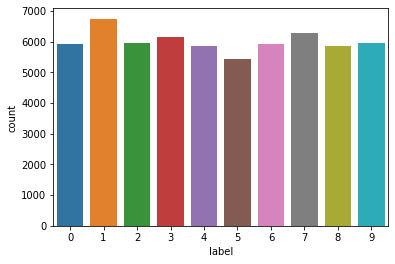

In [6]:
sns.countplot(df['label'])
plt.show()# looks kinda okay

In [7]:
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

We can observe the it is baised towards 1 a little and 5 has little less occurences any how we will br using the staratify option while splitiing the data

In [8]:
df.shape

(60000, 785)

In [9]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


# Separating train and test data frame for splitting

In [11]:
df_train = df.iloc[:,1:]
df_test = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train,df_test,test_size=0.2,stratify = df_test)

In [12]:
from sklearn.svm import SVC

In [14]:
#var = X_train.columns.to_list()

In [15]:
#scaler = StandardScaler()

In [16]:
#X_train[var] = scaler.fit_transform(X_train[var])

In [17]:
#X_test[var] = scaler.transform(X_test[var])

# Building Model

In [18]:
trn_model = SVC(kernel = 'poly', C = 0.001,gamma = 10) # found using Gridsearch

In [19]:
trn_model = trn_model.fit(X_train,y_train)

In [20]:
y_pred = trn_model.predict(X_test)

In [21]:
print(y_pred[100:105])
print(y_test[100:105])

[6 2 5 2 7]
6927     6
30811    2
51727    5
18206    2
59915    4
Name: label, dtype: int64


In [22]:
from sklearn import metrics

In [23]:
metrics.confusion_matrix(y_test,y_pred)

array([[1164,    0,    6,    0,    2,    6,    1,    0,    3,    3],
       [   0, 1323,    5,    1,    5,    1,    1,    4,    4,    4],
       [   7,   10, 1156,    5,    0,    2,    0,    6,    4,    2],
       [   3,    1,   10, 1185,    0,   12,    0,    2,   11,    2],
       [   2,    1,    4,    0, 1149,    0,    2,    4,    2,    4],
       [   2,    4,    5,    6,    3, 1052,    8,    0,    1,    3],
       [  10,    0,    3,    0,    1,    8, 1160,    0,    2,    0],
       [   0,    3,    5,    1,    1,    1,    0, 1228,    3,   11],
       [   5,    4,    4,   13,    5,   10,    1,    1, 1120,    7],
       [   2,    2,    0,    3,   13,    6,    0,   13,    3, 1148]],
      dtype=int64)

In [24]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1185
           1       0.98      0.98      0.98      1348
           2       0.96      0.97      0.97      1192
           3       0.98      0.97      0.97      1226
           4       0.97      0.98      0.98      1168
           5       0.96      0.97      0.96      1084
           6       0.99      0.98      0.98      1184
           7       0.98      0.98      0.98      1253
           8       0.97      0.96      0.96      1170
           9       0.97      0.96      0.97      1190

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [25]:
metrics.accuracy_score(y_test,y_pred)

0.97375

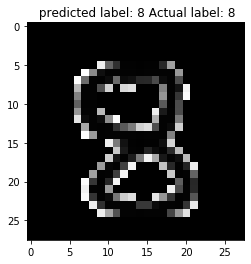

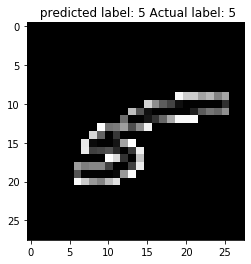

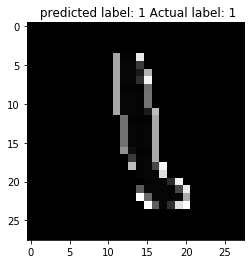

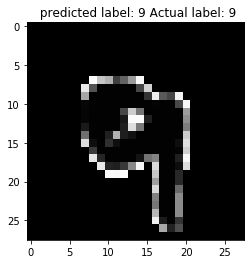

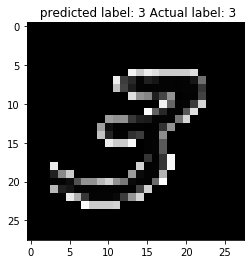

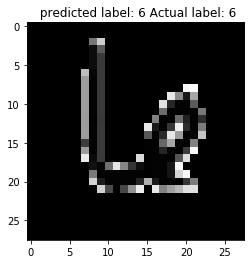

In [26]:
for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
 #print(y_test[i])
 plt.title(' predicted label: {0} Actual label: {1}'. format(y_pred[i], y_test.values[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

# Loading Test Dataset

In [15]:
df1= pd.read_csv('mnist_test.csv', sep=',', index_col=0)

In [16]:
df1 = df1.reset_index()
df1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_valid = df1.drop('label',1)

In [18]:
#X_valid[var] = scaler.transform(X_valid[var])

In [19]:
y_valid = df1.label

In [35]:
pred_valid = trn_model.predict(X_valid)

In [36]:
print(y_valid[100:115].values)
pred_valid[100:115]

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7]


array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7], dtype=int64)

In [37]:
metrics.confusion_matrix(y_valid,pred_valid)

array([[ 973,    1,    1,    0,    0,    2,    1,    1,    1,    0],
       [   0, 1125,    2,    1,    0,    1,    3,    0,    3,    0],
       [   7,    3, 1007,    0,    2,    0,    2,    8,    3,    0],
       [   0,    2,    2,  986,    0,    7,    0,    5,    5,    3],
       [   3,    0,    1,    0,  964,    0,    4,    2,    1,    7],
       [   3,    1,    2,   10,    1,  860,    6,    1,    6,    2],
       [   3,    5,    2,    0,    4,    4,  938,    0,    2,    0],
       [   0,   10,    9,    3,    2,    0,    0,  997,    0,    7],
       [   5,    0,    2,    6,    4,    4,    0,    4,  946,    3],
       [   3,    4,    1,    8,   10,    4,    1,    3,    2,  973]],
      dtype=int64)

In [38]:
print(metrics.classification_report(y_valid,pred_valid))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [40]:
print(metrics.accuracy_score(y_valid,pred_valid))

0.9769


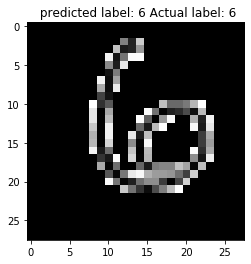

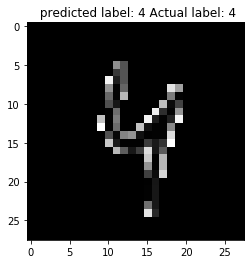

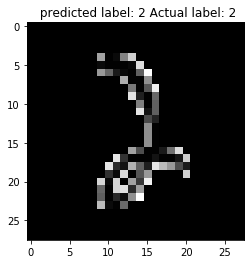

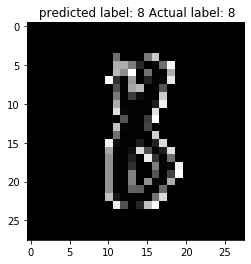

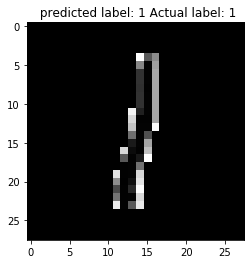

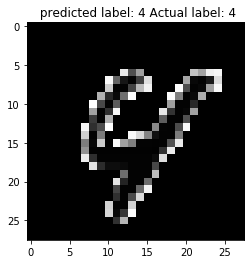

In [39]:
for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_valid.values[i], (28, 28))*255).astype(np.uint8)
 #print(y_test[i])
 plt.title(' predicted label: {0} Actual label: {1}'. format(pred_valid[i], y_valid.values[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

# Prediction from OWN handwritten images

In [63]:
import os
os.chdir('C:\\Users\\Dell\\Documents\\Projects\\SVM_hand_written_classification\\paint')

In [64]:
import numpy as np
from PIL import Image

In [65]:
numbers = ['{0}.JPG'.format(x) for x in range(0,10)]

In [66]:
numbers

['0.JPG',
 '1.JPG',
 '2.JPG',
 '3.JPG',
 '4.JPG',
 '5.JPG',
 '6.JPG',
 '7.JPG',
 '8.JPG',
 '9.JPG']

In [67]:
final_list=[]
for number in numbers:
    img = Image.open(number).convert('L')
    img_arr = img.resize((28,28))
    img_arr = np.array(img_arr)
    flat_img_arr = img_arr.flatten()
    img_list = flat_img_arr.tolist()
    img_list.insert(0, int(number[0]))
    final_list.append(img_list)

In [68]:
hnd = pd.DataFrame(final_list,columns=df.columns)
hnd

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,255,255,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_hnd = hnd.drop('label',1)
y_hnd = hnd['label']

In [ ]:
hnd_pred = trn_model.predict(X_hnd)

In [ ]:
print(y_hnd.values)
hnd_pred

In [56]:
metrics.confusion_matrix(y_hnd,hnd_pred)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [60]:
metrics.accuracy_score(y,hnd_pred)

0.5

In [57]:
df.shape

(60000, 785)

In [58]:
df1.shape

(10000, 785)

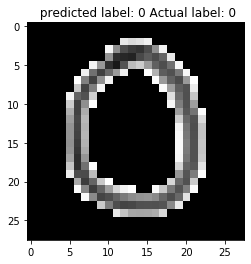

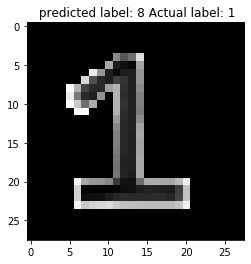

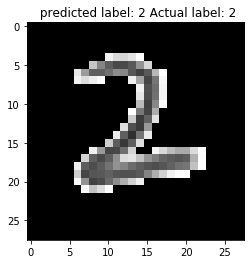

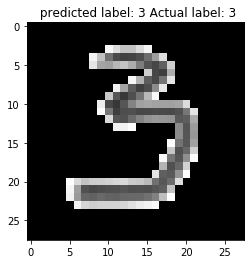

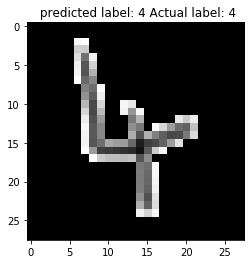

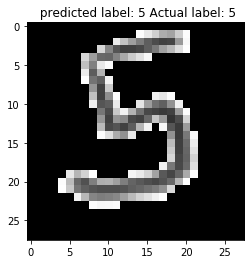

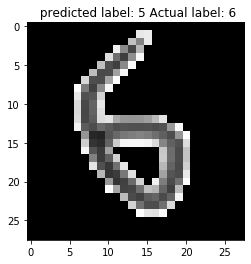

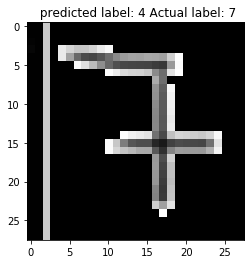

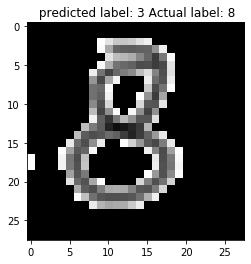

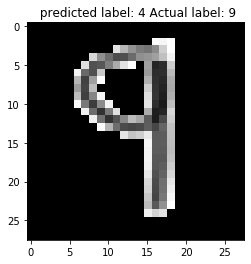

In [61]:
for i in range(10):
 two_d = (np.reshape(X.values[i], (28, 28))*255).astype(np.uint8)
 #print(y_test[i])
 plt.title(' predicted label: {0} Actual label: {1}'. format(hnd_pred[i], y.values[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

# Now we will train the entier trainig set

In [10]:
X = df.drop('label',1)
y = df.label

In [13]:
model = SVC(kernel = 'poly', C = 0.001,gamma = 10)

In [14]:
model = model.fit(X,y)

# Validation_Predictions

In [21]:
model_pred = model.predict(X_valid)

In [22]:
print(y_valid[100:115].values)
model_pred[100:115]

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7]


array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7], dtype=int64)

In [39]:
from sklearn import metrics
metrics.confusion_matrix(y_valid,model_pred)

array([[ 972,    0,    1,    1,    0,    3,    1,    0,    2,    0],
       [   0, 1126,    2,    1,    1,    0,    3,    0,    2,    0],
       [   8,    0, 1006,    0,    2,    0,    5,    8,    3,    0],
       [   0,    2,    1,  987,    0,    6,    0,    5,    6,    3],
       [   2,    0,    2,    0,  965,    0,    3,    1,    0,    9],
       [   2,    0,    0,   10,    1,  867,    3,    1,    5,    3],
       [   4,    5,    1,    0,    3,    6,  937,    0,    2,    0],
       [   0,   10,    9,    2,    1,    0,    0, 1000,    0,    6],
       [   5,    0,    1,    3,    4,    4,    1,    4,  950,    2],
       [   3,    6,    1,    5,    9,    3,    1,    1,    3,  977]],
      dtype=int64)

In [41]:
print(metrics.classification_report(y_valid,model_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [51]:
metrics.accuracy_score(y_valid,model_pred)

0.9787

In [47]:
X.shape

(60000, 784)

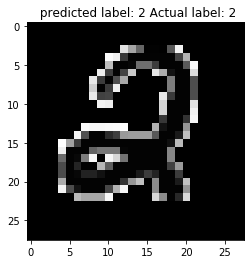

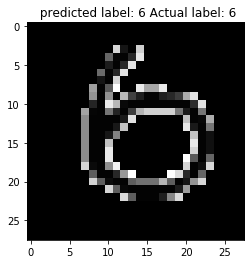

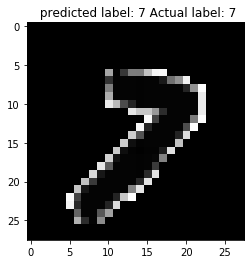

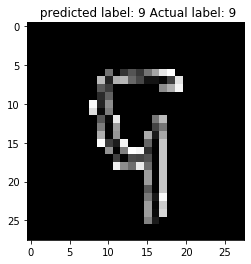

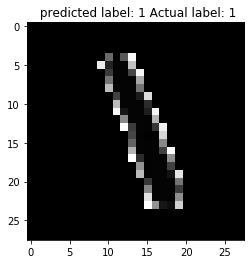

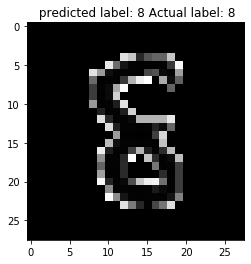

In [61]:
for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_valid.values[i], (28, 28))*255).astype(np.uint8)
 #print(y_test[i])
 plt.title(' predicted label: {0} Actual label: {1}'. format(model_pred[i], y_valid.values[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

# OWN HANDWRITING PREDICTION

In [70]:
hnd_pred = model.predict(X_hnd)

In [71]:
print(y_hnd.values)
hnd_pred

[0 1 2 3 4 5 6 7 8 9]


array([0, 2, 2, 3, 4, 5, 5, 4, 3, 4], dtype=int64)

In [72]:
from sklearn import metrics
metrics.confusion_matrix(y_hnd,hnd_pred)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [74]:
print(metrics.classification_report(y_hnd,hnd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.50      1.00      0.67         1
           4       0.33      1.00      0.50         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.28      0.50      0.35        10
weighted avg       0.28      0.50      0.35        10



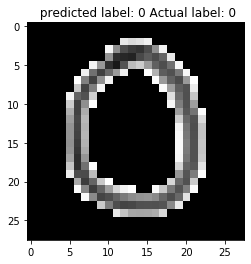

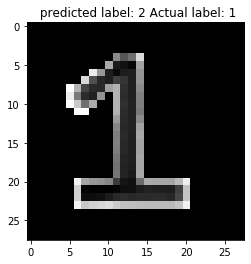

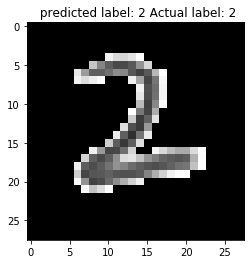

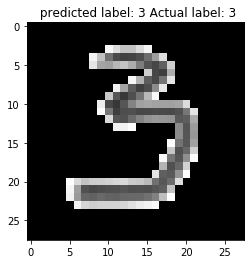

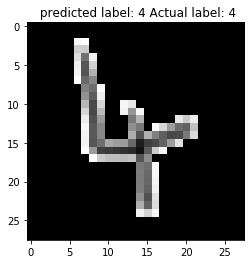

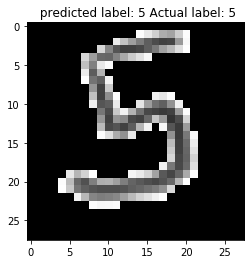

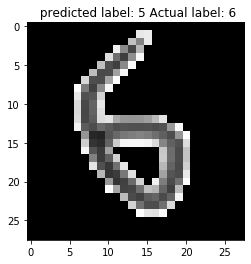

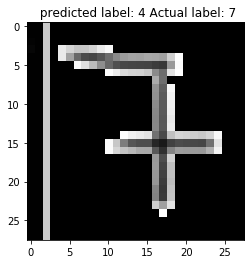

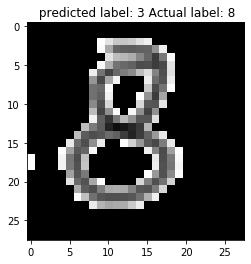

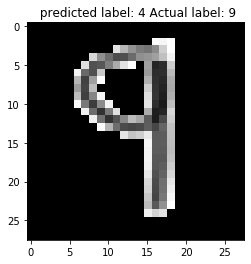

In [75]:
for i in (range(10)):
 two_d = (np.reshape(X_hnd.values[i], (28, 28))*255).astype(np.uint8)
 #print(y_test[i])
 plt.title(' predicted label: {0} Actual label: {1}'. format(hnd_pred[i], y_hnd.values[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()